In [204]:
#
import pandas as pd
import numpy as np
import json as json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [205]:
 # Loading the data from CSV into panadas dataframe
tempBalanceSheet = pd.read_csv (r'../data/balance-sheet.csv', sep=',')
tempMonthly = pd.read_csv (r'../data/monthly-data.csv', sep=',')

# renaming Balance sheet column "fiscalDateEnding" to "timestamp" to match column name on both dataframes
tempBalanceSheet = tempBalanceSheet.rename(columns={"fiscalDateEnding": "timestamp"})

# printing
print(tempBalanceSheet)
print(tempMonthly)

       timestamp reportedCurrency   totalAssets totalCurrentAssets  \
0     2021-09-30              USD  351002000000       134836000000   
1     2021-06-30              USD  329840000000       114423000000   
2     2021-03-31              USD  337158000000       121465000000   
3     2020-12-31              USD  354054000000       154106000000   
4     2020-09-30              USD  323888000000       143713000000   
...          ...              ...           ...                ...   
3852  2017-05-31              USD    4636000000         2269000000   
3853  2017-02-28              USD    4649000000         2290000000   
3854  2016-11-30              USD    4754000000         2261000000   
3855  2016-08-31              USD    4717000000         2230000000   
3856  2016-05-31              USD    5666000000         3169000000   

     cashAndCashEquivalentsAtCarryingValue cashAndShortTermInvestments  \
0                              34940000000                 62639000000   
1          

In [206]:
# filter both dataframes to only use a certain stock, in this case Apple (AAPL)
CompanyBalanceSheet = tempBalanceSheet.loc[tempBalanceSheet["symbol"] == "AAPL"]
CompanyMonthly = tempMonthly.loc[tempMonthly["Symbol"] == "AAPL"]

# printing
print(CompanyBalanceSheet.shape)
print(CompanyMonthly.shape)

(20, 39)
(264, 7)


In [207]:
# Cutting out unecessary data from the CompanyMonthly
# We only need price data in CompanyMonthly within the daterange of the 20 rows on CompanyBalanceSheet data
# every row is 3 months in CompanyBalanceSheet. Every row in CompanyMonthly is 1 month, 3x20 = 60.
CompanyMonthly = CompanyMonthly.loc[:60]

# printing
print(CompanyMonthly)
print(CompanyBalanceSheet)

     timestamp     open      high     low   close        volume Symbol
0   2021-11-19  148.985  161.0200  147.48  160.55  1.066135e+09   AAPL
1   2021-10-29    141.9  153.1650  138.27  149.80  1.565079e+09   AAPL
2   2021-09-30   152.83  157.2600  141.27  141.50  1.797948e+09   AAPL
3   2021-08-31   146.36  153.4900  144.50  151.83  1.462773e+09   AAPL
4   2021-07-30    136.6  150.0000  135.76  145.86  1.916751e+09   AAPL
..         ...      ...       ...     ...     ...           ...    ...
56  2017-03-31   137.89  144.5000  137.05  143.66  5.620912e+08   AAPL
57  2017-02-28   127.03  137.4800  127.01  136.99  5.749685e+08   AAPL
58  2017-01-31    115.8  122.4400  114.76  121.35  5.633312e+08   AAPL
59  2016-12-30  110.365  118.0166  108.25  115.82  6.087716e+08   AAPL
60  2016-11-30   113.46  113.7700  104.08  110.52  7.215550e+08   AAPL

[61 rows x 7 columns]
     timestamp reportedCurrency   totalAssets totalCurrentAssets  \
0   2021-09-30              USD  351002000000       13483

In [208]:
# Daily dates does not overlap on both dataframes, CompanyMonthly has the last trading day (not including weekends)
# While CompanyBalanaceSheet always has the last day of the month (including weekends)
# We need to cut out the daily date for both dataframes["timestamp"], to be able to merge them properly.

# Slicing the timestamp in CompanyMonthly, removing the days
sliceMonthly = CompanyMonthly["timestamp"].str.slice(0, -3)
CompanyMonthly["timestamp"] = sliceMonthly

# Printing
#print(sliceMonthly)
#print(CompanyMonthly)

# Slicing the timestamp in CompanyBalanceSheet, removing the days
sliceBalanceSheet = CompanyBalanceSheet["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
CompanyBalanceSheet.iloc[:, 0] = sliceBalanceSheet

# Printing
print(sliceBalanceSheet)
print(CompanyBalanceSheet["timestamp"])

# I get an error here alswell, but it doesn't seem to be affecting the code/compiler

0     2021-09
1     2021-06
2     2021-03
3     2020-12
4     2020-09
5     2020-06
6     2020-03
7     2019-12
8     2019-09
9     2019-06
10    2019-03
11    2018-12
12    2018-09
13    2018-06
14    2018-03
15    2017-12
16    2017-09
17    2017-06
18    2017-03
19    2016-12
Name: timestamp, dtype: object
0     2021-09
1     2021-06
2     2021-03
3     2020-12
4     2020-09
5     2020-06
6     2020-03
7     2019-12
8     2019-09
9     2019-06
10    2019-03
11    2018-12
12    2018-09
13    2018-06
14    2018-03
15    2017-12
16    2017-09
17    2017-06
18    2017-03
19    2016-12
Name: timestamp, dtype: object


C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [209]:
# merging the rows based on the date column
merged_df = pd.merge(CompanyBalanceSheet, CompanyMonthly, how="outer", on = "timestamp")

# Printing
print(merged_df)

   timestamp reportedCurrency   totalAssets totalCurrentAssets  \
0    2021-09              USD  351002000000       134836000000   
1    2021-06              USD  329840000000       114423000000   
2    2021-03              USD  337158000000       121465000000   
3    2020-12              USD  354054000000       154106000000   
4    2020-09              USD  323888000000       143713000000   
..       ...              ...           ...                ...   
56   2017-05              NaN           NaN                NaN   
57   2017-04              NaN           NaN                NaN   
58   2017-02              NaN           NaN                NaN   
59   2017-01              NaN           NaN                NaN   
60   2016-11              NaN           NaN                NaN   

   cashAndCashEquivalentsAtCarryingValue cashAndShortTermInvestments  \
0                            34940000000                 62639000000   
1                            34050000000                 616960

In [210]:
# removing the rows over 20
merged_df = merged_df.loc[:19]

# printing subset of columns
cat = ["timestamp", "symbol", "close"]
print(merged_df[cat])

   timestamp symbol   close
0    2021-09   AAPL  141.50
1    2021-06   AAPL  136.96
2    2021-03   AAPL  122.15
3    2020-12   AAPL  132.69
4    2020-09   AAPL  115.81
5    2020-06   AAPL  364.80
6    2020-03   AAPL  254.29
7    2019-12   AAPL  293.65
8    2019-09   AAPL  223.97
9    2019-06   AAPL  197.92
10   2019-03   AAPL  189.95
11   2018-12   AAPL  157.74
12   2018-09   AAPL  225.74
13   2018-06   AAPL  185.11
14   2018-03   AAPL  167.78
15   2017-12   AAPL  169.23
16   2017-09   AAPL  154.12
17   2017-06   AAPL  144.02
18   2017-03   AAPL  143.66
19   2016-12   AAPL  115.82


In [211]:

# calculate how much the increase is in percentage, interval of 3 months
# also offsetting by 1
cat = ["timestamp", "symbol", "close", "change"]

merged_df["change"] = merged_df["close"].pct_change(periods = -1).shift(periods = 1)
print(merged_df[cat].head(20))

   timestamp symbol   close    change
0    2021-09   AAPL  141.50       NaN
1    2021-06   AAPL  136.96  0.033148
2    2021-03   AAPL  122.15  0.121244
3    2020-12   AAPL  132.69 -0.079433
4    2020-09   AAPL  115.81  0.145756
5    2020-06   AAPL  364.80 -0.682538
6    2020-03   AAPL  254.29  0.434583
7    2019-12   AAPL  293.65 -0.134037
8    2019-09   AAPL  223.97  0.311113
9    2019-06   AAPL  197.92  0.131619
10   2019-03   AAPL  189.95  0.041958
11   2018-12   AAPL  157.74  0.204197
12   2018-09   AAPL  225.74 -0.301232
13   2018-06   AAPL  185.11  0.219491
14   2018-03   AAPL  167.78  0.103290
15   2017-12   AAPL  169.23 -0.008568
16   2017-09   AAPL  154.12  0.098040
17   2017-06   AAPL  144.02  0.070129
18   2017-03   AAPL  143.66  0.002506
19   2016-12   AAPL  115.82  0.240373


In [212]:
# Removing the first row, because we do not have a label for it, 3 months have not passed yet for us to get the end price of the 3 month cycle.
print(merged_df[cat].head(19))

merged_df.drop(index=merged_df.index[0], axis=0, inplace=True)
print(merged_df[cat].head(19))

   timestamp symbol   close    change
0    2021-09   AAPL  141.50       NaN
1    2021-06   AAPL  136.96  0.033148
2    2021-03   AAPL  122.15  0.121244
3    2020-12   AAPL  132.69 -0.079433
4    2020-09   AAPL  115.81  0.145756
5    2020-06   AAPL  364.80 -0.682538
6    2020-03   AAPL  254.29  0.434583
7    2019-12   AAPL  293.65 -0.134037
8    2019-09   AAPL  223.97  0.311113
9    2019-06   AAPL  197.92  0.131619
10   2019-03   AAPL  189.95  0.041958
11   2018-12   AAPL  157.74  0.204197
12   2018-09   AAPL  225.74 -0.301232
13   2018-06   AAPL  185.11  0.219491
14   2018-03   AAPL  167.78  0.103290
15   2017-12   AAPL  169.23 -0.008568
16   2017-09   AAPL  154.12  0.098040
17   2017-06   AAPL  144.02  0.070129
18   2017-03   AAPL  143.66  0.002506
   timestamp symbol   close    change
1    2021-06   AAPL  136.96  0.033148
2    2021-03   AAPL  122.15  0.121244
3    2020-12   AAPL  132.69 -0.079433
4    2020-09   AAPL  115.81  0.145756
5    2020-06   AAPL  364.80 -0.682538
6    2020-03

In [213]:
# Check datatypes in dataframe
print(merged_df.dtypes)

# Also dropping columns that we do not need, symbol, Symbol, open, high, low, close, volume etc.
merged_df.drop(['symbol', 'Symbol', 'open','high','low','close','volume', "timestamp", "reportedCurrency"], axis=1, inplace=True)

# replacing all "None" strings with NaN data type
merged_df = merged_df.replace('None', np.nan)

# Checking for "None" Strings
sub_df = merged_df.loc[: , (merged_df == 'None').any()]
print(sub_df)

# Casting all values to floats to calculate coffeicent and confusion matrix
merged_df = merged_df.astype("float64")
print(merged_df.dtypes)

# Checking for "None" Strings
sub_df = merged_df.loc[: , (merged_df == 'None').any()]
print(sub_df)

print(merged_df.isnull().values.any())

timestamp                                  object
reportedCurrency                           object
totalAssets                                object
totalCurrentAssets                         object
cashAndCashEquivalentsAtCarryingValue      object
cashAndShortTermInvestments                object
inventory                                  object
currentNetReceivables                      object
totalNonCurrentAssets                      object
propertyPlantEquipment                     object
accumulatedDepreciationAmortizationPPE     object
intangibleAssets                           object
intangibleAssetsExcludingGoodwill          object
goodwill                                   object
investments                                object
longTermInvestments                        object
shortTermInvestments                       object
otherCurrentAssets                         object
otherNonCurrrentAssets                     object
totalLiabilities                           object


In [214]:

for col in merged_df.columns:
    merged_df[col] = merged_df[col].replace('None', merged_df[col].mean())

print(merged_df)

     totalAssets  totalCurrentAssets  cashAndCashEquivalentsAtCarryingValue  \
1   3.298400e+11        1.144230e+11                           3.405000e+10   
2   3.371580e+11        1.214650e+11                           3.846600e+10   
3   3.540540e+11        1.541060e+11                           3.601000e+10   
4   3.238880e+11        1.437130e+11                           3.801600e+10   
5   3.173440e+11        1.400650e+11                           3.338300e+10   
6   3.204000e+11        1.437530e+11                           4.017400e+10   
7   3.406180e+11        1.632310e+11                           3.977100e+10   
8   3.385160e+11        1.628190e+11                           4.884400e+10   
9   3.222390e+11        1.349730e+11                           5.053000e+10   
10  3.419980e+11        1.233460e+11                           3.798800e+10   
11  3.737190e+11        1.408280e+11                           4.477100e+10   
12  3.657250e+11        1.313390e+11                

change                                    1.000000
intangibleAssets                          0.798920
intangibleAssetsExcludingGoodwill         0.685535
otherCurrentAssets                        0.385537
cashAndCashEquivalentsAtCarryingValue     0.195651
totalNonCurrentAssets                     0.165483
totalShareholderEquity                    0.163022
retainedEarnings                          0.161274
cashAndShortTermInvestments               0.132319
currentLongTermDebt                       0.086581
longTermInvestments                       0.083035
totalNonCurrentLiabilities                0.047799
inventory                                 0.029967
commonStockSharesOutstanding              0.023178
shortLongTermDebtTotal                   -0.000734
totalAssets                              -0.006600
currentDebt                              -0.018410
shortTermDebt                            -0.065852
totalCurrentAssets                       -0.095893
otherNonCurrrentAssets         

<AxesSubplot:>

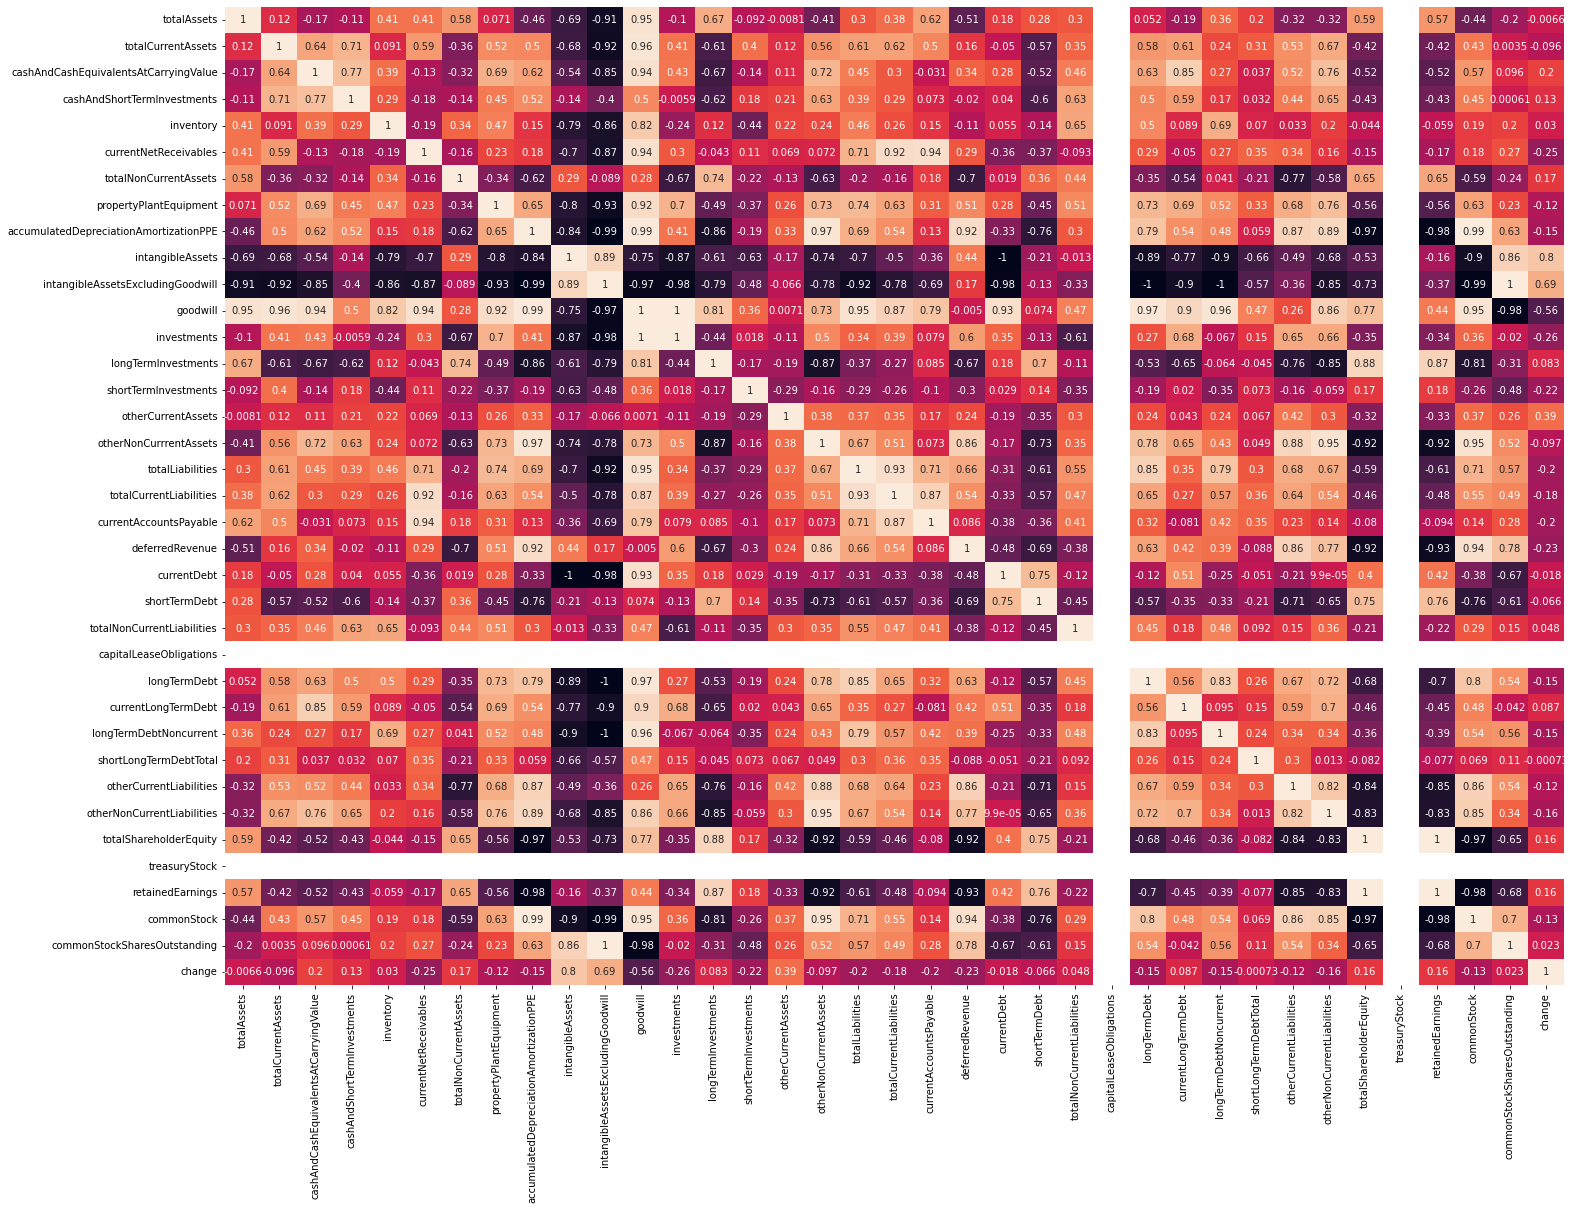

In [215]:
# correlation calculation
feature_corr = merged_df.copy().corr()

# Then, print correlation of 'Sale Price' with other features from 'feature_corr' and sort  in descending order
#  ===== YOUR CODE HERE ==========
sortedDesc = feature_corr["change"].sort_values(ascending=False) 
print(sortedDesc)

#cf_matrix = confusion_matrix(feature_corr)
plt.figure(figsize = (24,18))
sns.heatmap(feature_corr, annot=True, cbar=False, )